# 0. Plot frequency of template in train set vs percentage of accurate template predictions in test set

notebook: A_template_info_extraction.ipynb  section 0.0.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
plotdata = pd.read_pickle('/home/yves/Documents/GitHub/CASP-and-dataset-performance/results/testset_plot_data_001.pkl')

In [3]:
#sort dataframes by x axis values
plotdata.sort_values(by=['num_app_train'], inplace=True)

#create new dataframe with templates in test set present 20 times or more
plotdata_more20 = plotdata[plotdata['len_temp'] >= 20]

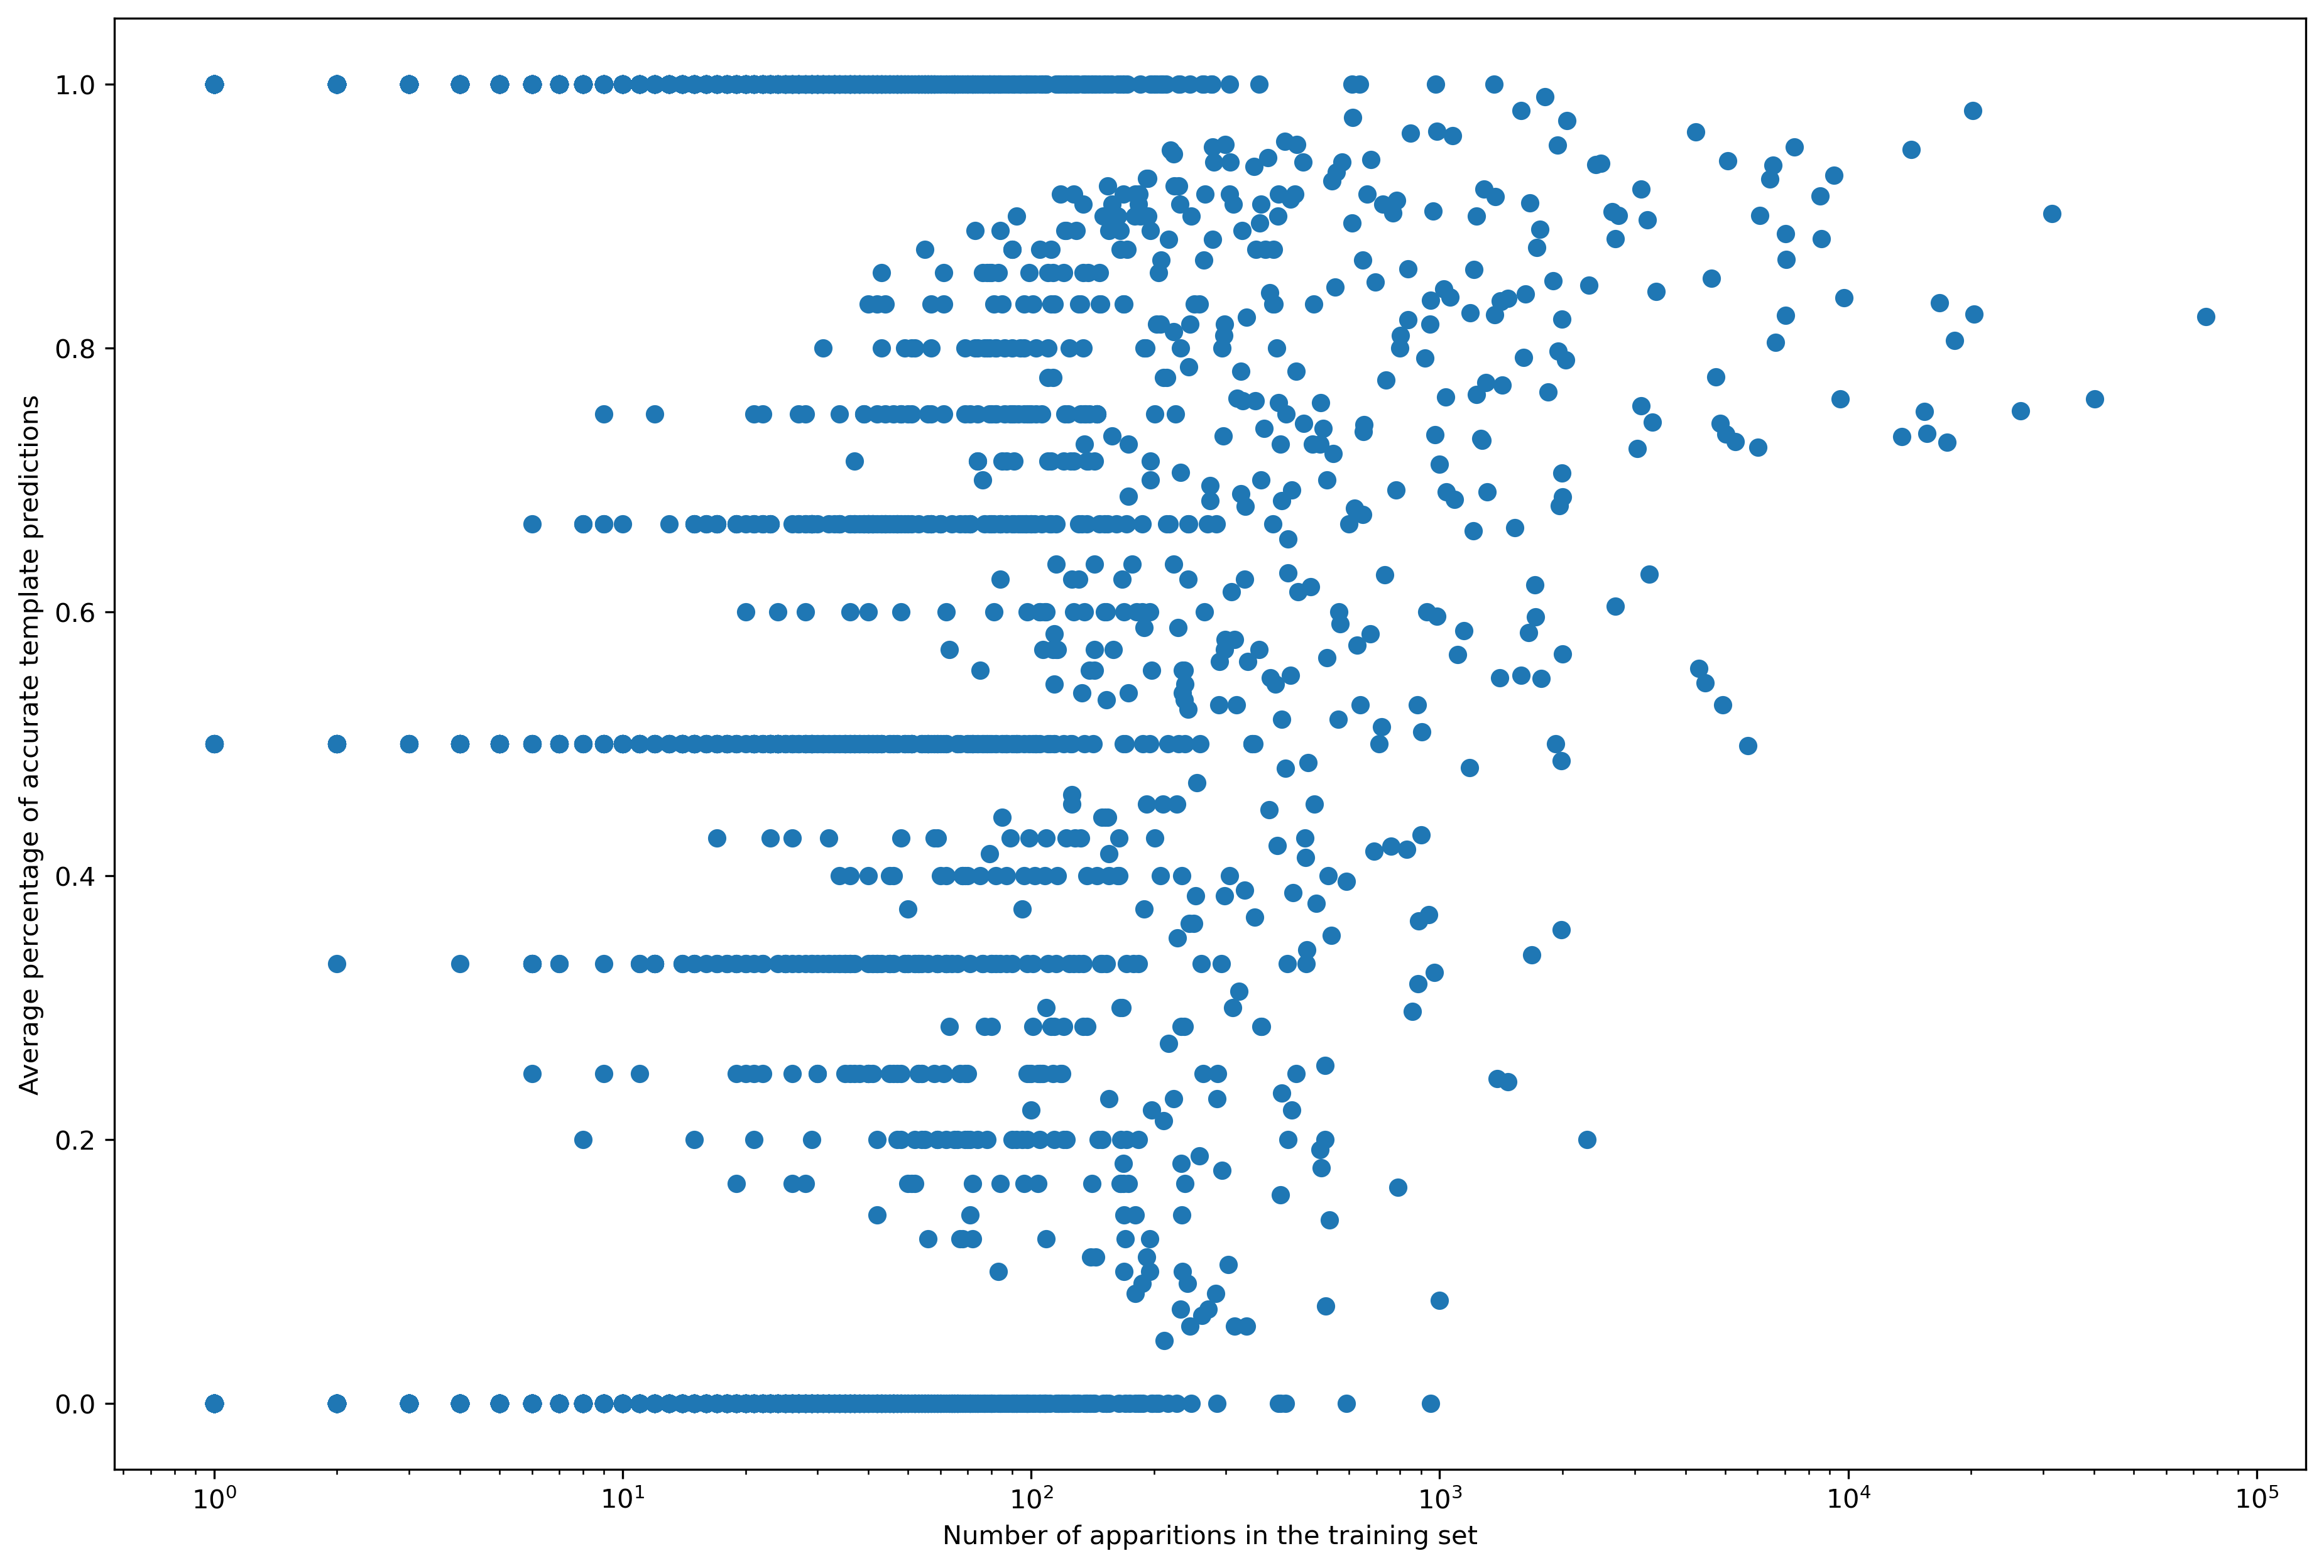

In [39]:
#A) original plot
x = plotdata['num_app_train'].values    #number of apparitions in the training set
y1 = plotdata['#perc'].values           #percentage of accurate template predictions

fig, ax = plt.subplots()

ax.set_xlabel('Number of apparitions in the training set')
ax.set_ylabel('Average percentage of accurate template predictions')
plt.xscale('log')
plt.plot(x,y1, 'o')

In [9]:
import matplotlib
font = {'size'   : 14}

matplotlib.style.use('default')
matplotlib.rc('font', **font)

<Figure size 2400x1800 with 0 Axes>

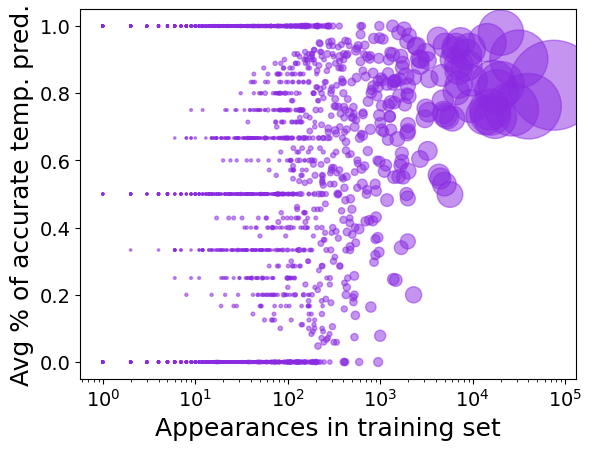

In [26]:
# B) scatter plot with area of circle proportional to number of apparitions in the test set

x = plotdata['num_app_train'].values    #number of apparitions in the training set
y1 = plotdata['#perc'].values           #percentage of accurate template predictions
y2 = plotdata['len_temp'].values        #number of apparitions in the test set

area = y2                          #area of circles is the square of the number of apparitions in the test set
plt.figure(figsize=(24, 18))
fig, ax = plt.subplots()
ax.set_xlabel('Appearances in training set', fontsize=18)
ax.set_ylabel('Avg % of accurate temp. pred.', fontsize=18)
plt.xscale('log')
plt.scatter(x, y1, s=area, alpha=0.5, color = 'blueviolet')
plt.show()

<Figure size 2400x1800 with 0 Axes>

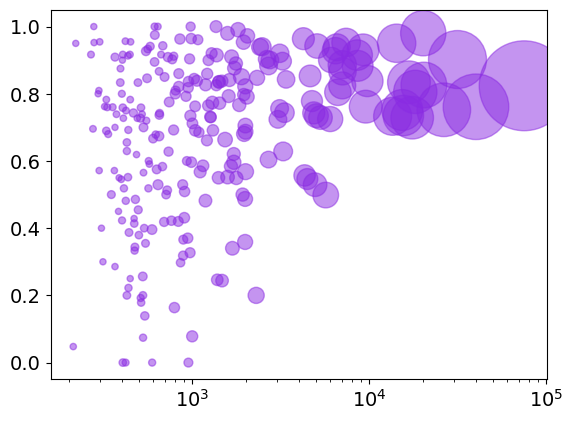

In [28]:
# C) scatter plot with area of circle proportional to number of apparitions in the test set with only templates present 20 times or more in the test set (more reliable average percentage)

x = plotdata_more20['num_app_train'].values    #number of apparitions in the training set
y1 = plotdata_more20['#perc'].values           #percentage of accurate template predictions
y2 = plotdata_more20['len_temp'].values        #number of apparitions in the test set

area = y2                          #area of circles is the square of the number of apparitions in the test set

plt.figure(figsize=(24, 18))
fig, ax = plt.subplots()
#ax.set_xlabel('Appearances in training set', fontsize=18)
#ax.set_ylabel('Avg % of accurate temp. pred.', fontsize=18)
plt.xscale('log')
plt.scatter(x, y1, s=area, alpha=0.5, color = 'blueviolet')
plt.show()

# 1. TMAPs comparing created reactions (from GDB13S) and original reactions (USPTO)

## 1.1 Reductive amination rxnfp (C_USPTO_balancing 2.8.3 reductive amination)

In [1]:
!conda env list

# conda environments:
#
                         /home/yves/Documents/GitHub/ReactionClasses/.conda
                         /home/yves/Documents/Projects/hello/.conda
base                     /home/yves/anaconda3
MultiStepRetro           /home/yves/anaconda3/envs/MultiStepRetro
MultiStepRetro1.4        /home/yves/anaconda3/envs/MultiStepRetro1.4
MultiStepRetrotest       /home/yves/anaconda3/envs/MultiStepRetrotest
aizynth-env              /home/yves/anaconda3/envs/aizynth-env
aizynthtrain             /home/yves/anaconda3/envs/aizynthtrain
casp_env                 /home/yves/anaconda3/envs/casp_env
cookiecutter             /home/yves/anaconda3/envs/cookiecutter
enz_trans                /home/yves/anaconda3/envs/enz_trans
graph2smiles             /home/yves/anaconda3/envs/graph2smiles
graphormerhf             /home/yves/anaconda3/envs/graphormerhf
graphretrosynthesis      /home/yves/anaconda3/envs/graphretrosynthesis
mypackaging              /home/yves/anaconda3/envs/mypackaging
onmtggn

In [1]:
import pandas as pd
import tmap
from faerun import Faerun
from mhfp.encoder import MHFPEncoder
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
from rxnfp.transformer_fingerprints import (
    RXNBERTFingerprintGenerator, get_default_model_and_tokenizer, generate_fingerprints, RXNBERTMinhashFingerprintGenerator
)
model, tokenizer = get_default_model_and_tokenizer()

rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)

In [2]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap.csv')

### method from TMAP_amino_alcohols.ipynb

In [38]:
rest = len(df)%8
model, tokenizer = get_default_model_and_tokenizer('bert_ft_10k_25s')
ft_10k_rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)
fps_ft_10k = generate_fingerprints(df['rxn_smiles'][0:(len(df)-rest)].values.tolist(), ft_10k_rxnfp_generator, batch_size=8)
lf = tmap.LSHForest(256, 128)
mh_encoder = tmap.Minhash()
mhfps = [mh_encoder.from_weight_array(fp.tolist(), method="I2CWS") for fp in tqdm(fps_ft_10k)]

if rest != 0:
    fps_ft_10k_rest = generate_fingerprints(df['rxn_smiles'][-rest:].values.tolist(), ft_10k_rxnfp_generator, batch_size=rest)
    mhfps_rest = [mh_encoder.from_weight_array(fp.tolist(), method="I2CWS") for fp in tqdm(fps_ft_10k_rest)]
    
    fps_ft_10k = np.append(fps_ft_10k, fps_ft_10k_rest,axis=0)
    mhfps = mhfps + mhfps_rest

Some weights of the model checkpoint at /home/yves/Documents/Projects/tmap/rxnfp_repo/rxnfp/models/transformers/bert_ft_10k_25s were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 10000/10000 [00:01<00:00, 6421.09it/s]


In [44]:
df['mhfps'] = mhfps

In [42]:
targets = []
for i in range(len(df)):
    precursor, target = df.at[i, 'rxn_smiles'].split('>>')
    targets.append(target)
df['target'] = targets

In [43]:
labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):

    rxn = row["rxn_smiles"]
    labels.append(
        str(rxn)
    )

100%|██████████| 10000/10000 [00:00<00:00, 15908.63it/s]


In [45]:
lf = tmap.LSHForest(512, 32)

rxnfp_fp = np.array(df['mhfps'])
fps = []

for i in rxnfp_fp:
    vec = tmap.VectorUint(i)
    fps.append(vec)

lf.batch_add(fps)
lf.index()

cfg = tmap.LayoutConfiguration() #configuration parameters for tmapap layout
cfg.node_size = 1 / 40 #size of nodes which affects the magnitude of their repelling force. Decreasing this values generally resolves overlaps in a very crowded tree
cfg.mmm_repeats = 2 #number of repeats of the per-level layout algorithm
cfg.sl_extra_scaling_steps = 5 #sets the number of repeats of the scaling
cfg.k = 30 #number of nearest neighbours used to create the k-nearest neighbour graph
cfg.sl_scaling_type = tmap.RelativeToAvgLength #Defines the relative scale of the graph
x, y, s, t, _ = tmap.layout_from_lsh_forest(lf, cfg)

In [48]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color="#FFFFFF",
)

f.add_scatter(
    "reduc_amination_rxnfp_TMAP",
    {
        "x": x,
        "y": y,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("reduc_amination_rxnfp_TMAP_tree", {"from": s, "to": t}, point_helper="reduc_amination_rxnfp_TMAP")
f.plot('reduc_amination_rxnfp_TMAP', template='reaction_smiles')

/home/yves/Documents/GitHub/USPTO_balance/notebooks/reduc_amination_rxnfp_TMAP.html

## 1.1 (2) reductive amination drfp

### 1. Imports

In [1]:
!conda env list

# conda environments:
#
                         /home/yves/Documents/GitHub/ReactionClasses/.conda
                         /home/yves/Documents/Projects/hello/.conda
base                     /home/yves/anaconda3
MultiStepRetro           /home/yves/anaconda3/envs/MultiStepRetro
MultiStepRetro1.4        /home/yves/anaconda3/envs/MultiStepRetro1.4
MultiStepRetrotest       /home/yves/anaconda3/envs/MultiStepRetrotest
aizynth-env              /home/yves/anaconda3/envs/aizynth-env
aizynthtrain             /home/yves/anaconda3/envs/aizynthtrain
casp_env                 /home/yves/anaconda3/envs/casp_env
cookiecutter             /home/yves/anaconda3/envs/cookiecutter
drfp                  *  /home/yves/anaconda3/envs/drfp
enz_trans                /home/yves/anaconda3/envs/enz_trans
graph2smiles             /home/yves/anaconda3/envs/graph2smiles
graphormerhf             /home/yves/anaconda3/envs/graphormerhf
graphretrosynthesis      /home/yves/anaconda3/envs/graphretrosynthesis
mypackaging   

In [9]:
import numpy as np 
import pandas as pd
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', 400)
from tqdm import tqdm

import os
import joblib

import tmap as tm 
from faerun import Faerun

from sklearn.neighbors import NearestNeighbors
from matplotlib import cm

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
from drfp import DrfpEncoder

### 2. Dataset

In [10]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap.csv')

In [11]:
import multiprocessing as mp

def __multi_encode(smiles):
    return DrfpEncoder.encode(X=[smiles])

df['DRFP'] = ''
p = mp.Pool(mp.cpu_count())
df['DRFP'] = tqdm(p.imap(__multi_encode, df['rxn_smiles']), total=int(len(df)))

100%|██████████| 10000/10000 [00:08<00:00, 1184.27it/s]


### 3. TMAP 

In [12]:
project = 'df_USPTO_enrich_10k_DRFP_21.11.2023'

In [13]:
lf = tm.LSHForest(2024, 256)
enc = tm.Minhash()

In [37]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]

In [39]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]
#drfps = df['DRFP'].values.tolist() yields error with dimension 3 instead of <=2

knn = 20
knn_search = NearestNeighbors(n_neighbors=knn, radius=1.0, algorithm='auto', leaf_size=30, metric='jaccard', p=2, metric_params=None, n_jobs=None)
knn_search.fit(np.array(drfps))

edge_list = []
for i in tqdm(range(len(drfps))):
    dists, idxs = knn_search.kneighbors(drfps[i].reshape(1, -1))
    for j in range(knn):
        edge_list.append([i, idxs[0, j], dists[0, j]])

100%|██████████| 10000/10000 [01:27<00:00, 114.58it/s]


#### 3.1 Save layout

In [73]:
FORCE = True
if FORCE or not os.path.exists('./5__TMAP/Pickles' + project + '__tmap_layout.pkl'):
    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 32
    cfg.mmm_repeats = 2
    cfg.sl_extra_scaling_steps = 5
    cfg.k = 20
    cfg.sl_scaling_type = tm.RelativeToAvgLength

    x_, y_, s, t, gp = tm.layout_from_edge_list(len(drfps), edge_list, cfg)
    tm_layout_drfp = {'x': list(x_), 'y': list(y_), 's': list(s), 't': list(t)}
    joblib.dump(tm_layout_drfp, './5__TMAP/Pickles' + project + '__tmap_layout.pkl')
else:
    tm_layout_drfp = joblib.load('./5__TMAP/Pickles' + project + '__tmap_layout.pkl')

#### 3.2 Categories

In [ ]:
#df_sample['Reagents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Reagent']]
#df_sample['Catalysts_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Catalyst']]
#df_sample['Solvents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Solvent']]
#
#RxnClassification__labels, RxnClassification__data = Faerun.create_categories(df_sample['Reaction_Classification'].values.tolist())
#IsLabelledENZ__labels, IsLabelledENZ__data = Faerun.create_categories(df_sample['IsEnz'].values.tolist())
##TwoProd__labels, TwoProd__data = Faerun.create_categories(df_sample['MoreTwoProducts'].values.tolist())
#
#IsLabelledENZ__labels = [(0, 'Unlabelled New Rxn'), (1, 'Labelled')]
##TwoProd__labels = [(0, 'Correct rxn'), (1, 'More than 2 products')]

In [74]:
labels = []
for i, row in df.iterrows():
    labels.append(
            row["rxn_smiles"]
           # + f"__{row['Reaction_ID']}"
           # + f"__{row['RXN_SMILES']}"
           # + f"__{row['Reagents_label']}"
           # + f"__{row['Catalysts_label']}"
           # + f"__{row['Solvents_label']}"
        )

In [75]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color='#FFFFFF',
    thumbnail_width=900,
    thumbnail_fixed=True
)

f.add_scatter(
    "USPTO_enrich_reduc_amin_TMAP",
    {
        "x": x_,
        "y": y_,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("USPTO_enrich_reduc_amin_TMAP_tree", {"from": tm.VectorUint(tm_layout_drfp['s']), "to": tm.VectorUint(tm_layout_drfp['t'])}, point_helper="USPTO_enrich_reduc_amin_TMAP")
f.plot('5__TMAP/' + project + '_black', template='reaction_smiles')

/home/yves/Documents/GitHub/USPTO_balance/notebooks/5__TMAP/df_USPTO_enrich_10k_DRFP_21.11.2023_black.html

## 1.1 (3) reductive amination drfp USPTO (original) vs USPTO (created) vs GDB13S_rand (created)

In [1]:
!conda env list

# conda environments:
#
                         /home/yves/Documents/GitHub/ReactionClasses/.conda
base                     /home/yves/anaconda3
MultiStepRetro           /home/yves/anaconda3/envs/MultiStepRetro
MultiStepRetro1.4        /home/yves/anaconda3/envs/MultiStepRetro1.4
MultiStepRetrotest       /home/yves/anaconda3/envs/MultiStepRetrotest
aizynth-env              /home/yves/anaconda3/envs/aizynth-env
aizynthtrain             /home/yves/anaconda3/envs/aizynthtrain
casp_env                 /home/yves/anaconda3/envs/casp_env
cookiecutter             /home/yves/anaconda3/envs/cookiecutter
drfp                  *  /home/yves/anaconda3/envs/drfp
enz_trans                /home/yves/anaconda3/envs/enz_trans
graph2smiles             /home/yves/anaconda3/envs/graph2smiles
graphormerhf             /home/yves/anaconda3/envs/graphormerhf
graphretrosynthesis      /home/yves/anaconda3/envs/graphretrosynthesis
mypackaging              /home/yves/anaconda3/envs/mypackaging
onmtggnn           

In [2]:
import numpy as np 
import pandas as pd
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', 400)
from tqdm import tqdm

import os
import joblib

import tmap as tm 
from faerun import Faerun

from sklearn.neighbors import NearestNeighbors
from matplotlib import cm

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
from drfp import DrfpEncoder

### 2. Dataset

In [3]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap_red_amin.csv')

In [4]:
df.sample(frac=1).reset_index(drop=True)

,Unnamed: 0,rxn_smiles,is_original_rxn
0,1985,CC12COC(CCO)CC1(C)C2O>>CC12COC(CC=O)CC1(C)C2O,0
1,13535,CC(=O)O[BH-](OC(C)=O)OC(C)=O.CC(C)(C)OC(=O)Nc1...,2
2,13991,C1CCOC1.CC(=O)O[BH-](OC(C)=O)OC(C)=O.CCN(CC)CC...,2
3,2054,C#CC1(CCC#CCO)CC1OC>>C#CC1(CCC#CC=O)CC1OC,0
4,13022,CC(=O)O[BH-](OC(C)=O)OC(C)=O.CC(C)(N)C(=O)OC1C...,2
...,...,...,...
14995,6550,O=CC(F)(F)F.CC[C@H](NC(=O)OC(C)(C)C)C(=O)N1c2c...,1
14996,7725,O=CCCO.NC(=O)COCC(=O)O>>O=C(O)COCC(=O)NCCCO,1
14997,4634,CC(CO)(CC#N)c1cc(=O)o[nH]1>>CC(C=O)(CC#N)c1cc(...,0
14998,13050,CC(C)Cc1ccc(-c2ccc(Cc3nc(-c4ccc(Cl)cc4Cl)cn3-c...,2


In [5]:
import multiprocessing as mp

def __multi_encode(smiles):
    return DrfpEncoder.encode(X=[smiles])

df['DRFP'] = ''
p = mp.Pool(mp.cpu_count())
df['DRFP'] = tqdm(p.imap(__multi_encode, df['rxn_smiles']), total=int(len(df)))

100%|██████████| 15000/15000 [00:13<00:00, 1074.75it/s]


### 3. TMAP

In [6]:
project = 'df_USPTO_enrich_10k_DRFP_amin_red_27.11.2023'

In [7]:
lf = tm.LSHForest(2024, 256)
enc = tm.Minhash()

In [8]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]

In [9]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]
#drfps = df['DRFP'].values.tolist() yields error with dimension 3 instead of <=2

knn = 20
knn_search = NearestNeighbors(n_neighbors=knn, radius=1.0, algorithm='auto', leaf_size=30, metric='jaccard', p=2, metric_params=None, n_jobs=None)
knn_search.fit(np.array(drfps))

edge_list = []
for i in tqdm(range(len(drfps))):
    dists, idxs = knn_search.kneighbors(drfps[i].reshape(1, -1))
    for j in range(knn):
        edge_list.append([i, idxs[0, j], dists[0, j]])

  0%|          | 7/15000 [00:00<03:55, 63.57it/s]

100%|██████████| 15000/15000 [03:20<00:00, 74.71it/s]


#### 3.1 Save layout

In [10]:
FORCE = True
if FORCE or not os.path.exists('./5__TMAP/Pickles' + project + '__tmap_layout.pkl'):
    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 32
    cfg.mmm_repeats = 2
    cfg.sl_extra_scaling_steps = 5
    cfg.k = 20
    cfg.sl_scaling_type = tm.RelativeToAvgLength

    x_, y_, s, t, gp = tm.layout_from_edge_list(len(drfps), edge_list, cfg)
    tm_layout_drfp = {'x': list(x_), 'y': list(y_), 's': list(s), 't': list(t)}
    joblib.dump(tm_layout_drfp, './5__TMAP/Pickles' + project + '__tmap_layout.pkl')
else:
    tm_layout_drfp = joblib.load('./5__TMAP/Pickles' + project + '__tmap_layout.pkl')

#### 3.2 Save categories

In [11]:
#df_sample['Reagents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Reagent']]
#df_sample['Catalysts_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Catalyst']]
#df_sample['Solvents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Solvent']]
#
#RxnClassification__labels, RxnClassification__data = Faerun.create_categories(df_sample['Reaction_Classification'].values.tolist())
#IsLabelledENZ__labels, IsLabelledENZ__data = Faerun.create_categories(df_sample['IsEnz'].values.tolist())
##TwoProd__labels, TwoProd__data = Faerun.create_categories(df_sample['MoreTwoProducts'].values.tolist())
#
#IsLabelledENZ__labels = [(0, 'Unlabelled New Rxn'), (1, 'Labelled')]
##TwoProd__labels = [(0, 'Correct rxn'), (1, 'More than 2 products')]

In [12]:
labels = []
for i, row in df.iterrows():
    labels.append(
            row["rxn_smiles"]
           # + f"__{row['Reaction_ID']}"
           # + f"__{row['RXN_SMILES']}"
           # + f"__{row['Reagents_label']}"
           # + f"__{row['Catalysts_label']}"
           # + f"__{row['Solvents_label']}"
        )

In [13]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color='#FFFFFF',
    thumbnail_width=900,
    thumbnail_fixed=True
)

f.add_scatter(
    "USPTO_enrich_reduc_amin_TMAP",
    {
        "x": x_,
        "y": y_,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("USPTO_enrich_reduc_amin_TMAP_tree", {"from": tm.VectorUint(tm_layout_drfp['s']), "to": tm.VectorUint(tm_layout_drfp['t'])}, point_helper="USPTO_enrich_reduc_amin_TMAP")
f.plot('5__TMAP/' + project + '_black', template='reaction_smiles')

/home/yves/Documents/GitHub/USPTO_balance/notebooks/5__TMAP/df_USPTO_enrich_10k_DRFP_amin_red_27.11.2023_black.html

## 1.2 Alcohol oxidation to carbonyl rxnfp

In [76]:
!conda env list

# conda environments:
#
                         /home/yves/Documents/GitHub/ReactionClasses/.conda
base                     /home/yves/anaconda3
MultiStepRetro           /home/yves/anaconda3/envs/MultiStepRetro
MultiStepRetro1.4        /home/yves/anaconda3/envs/MultiStepRetro1.4
MultiStepRetrotest       /home/yves/anaconda3/envs/MultiStepRetrotest
aizynth-env              /home/yves/anaconda3/envs/aizynth-env
aizynthtrain             /home/yves/anaconda3/envs/aizynthtrain
casp_env                 /home/yves/anaconda3/envs/casp_env
cookiecutter             /home/yves/anaconda3/envs/cookiecutter
drfp                  *  /home/yves/anaconda3/envs/drfp
enz_trans                /home/yves/anaconda3/envs/enz_trans
graph2smiles             /home/yves/anaconda3/envs/graph2smiles
graphormerhf             /home/yves/anaconda3/envs/graphormerhf
graphretrosynthesis      /home/yves/anaconda3/envs/graphretrosynthesis
mypackaging              /home/yves/anaconda3/envs/mypackaging
onmtggnn           

In [77]:
import pandas as pd
import tmap
from faerun import Faerun
from mhfp.encoder import MHFPEncoder
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
from rxnfp.transformer_fingerprints import (
    RXNBERTFingerprintGenerator, get_default_model_and_tokenizer, generate_fingerprints, RXNBERTMinhashFingerprintGenerator
)
model, tokenizer = get_default_model_and_tokenizer()

rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)

ModuleNotFoundError: No module named 'mhfp'

In [11]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap_alc_ox_to_ket.csv')

In [12]:
rest = len(df)%8
model, tokenizer = get_default_model_and_tokenizer('bert_ft_10k_25s')
ft_10k_rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)
fps_ft_10k = generate_fingerprints(df['rxn_smiles'][0:(len(df)-rest)].values.tolist(), ft_10k_rxnfp_generator, batch_size=8)
lf = tmap.LSHForest(256, 128)
mh_encoder = tmap.Minhash()
mhfps = [mh_encoder.from_weight_array(fp.tolist(), method="I2CWS") for fp in tqdm(fps_ft_10k)]

if rest != 0:
    fps_ft_10k_rest = generate_fingerprints(df['rxn_smiles'][-rest:].values.tolist(), ft_10k_rxnfp_generator, batch_size=rest)
    mhfps_rest = [mh_encoder.from_weight_array(fp.tolist(), method="I2CWS") for fp in tqdm(fps_ft_10k_rest)]
    
    fps_ft_10k = np.append(fps_ft_10k, fps_ft_10k_rest,axis=0)
    mhfps = mhfps + mhfps_rest

Some weights of the model checkpoint at /home/yves/Documents/Projects/tmap/rxnfp_repo/rxnfp/models/transformers/bert_ft_10k_25s were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 10000/10000 [00:01<00:00, 6607.59it/s]


In [13]:
df['mhfps'] = mhfps

In [14]:
targets = []
for i in range(len(df)):
    precursor, target = df.at[i, 'rxn_smiles'].split('>>')
    targets.append(target)
df['target'] = targets

In [15]:
labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):

    rxn = row["rxn_smiles"]
    labels.append(
        str(rxn)
    )

100%|██████████| 10000/10000 [00:00<00:00, 18897.12it/s]


In [16]:
lf = tmap.LSHForest(512, 32)

rxnfp_fp = np.array(df['mhfps'])
fps = []

for i in rxnfp_fp:
    vec = tmap.VectorUint(i)
    fps.append(vec)

lf.batch_add(fps)
lf.index()

cfg = tmap.LayoutConfiguration() #configuration parameters for tmapap layout
cfg.node_size = 1 / 40 #size of nodes which affects the magnitude of their repelling force. Decreasing this values generally resolves overlaps in a very crowded tree
cfg.mmm_repeats = 2 #number of repeats of the per-level layout algorithm
cfg.sl_extra_scaling_steps = 5 #sets the number of repeats of the scaling
cfg.k = 30 #number of nearest neighbours used to create the k-nearest neighbour graph
cfg.sl_scaling_type = tmap.RelativeToAvgLength #Defines the relative scale of the graph
x, y, s, t, _ = tmap.layout_from_lsh_forest(lf, cfg)

In [22]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color="#FFFFFF",
)

f.add_scatter(
    "alc_ox_to_ketone_rxnfp_TMAP",
    {
        "x": x,
        "y": y,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("alc_ox_to_ketone_rxnfp_TMAP_tree", {"from": s, "to": t}, point_helper="alc_ox_to_ketone_rxnfp_TMAP")
f.plot('alc_ox_to_ketone_rxnfp_TMAP', template='reaction_smiles')

/home/yves/Documents/GitHub/USPTO_balance/notebooks/alc_ox_to_ketone_rxnfp_TMAP.html

## 1.2 (2) Alcohol oxidation drfp (created with GDB13S vs created with USPTO vs original USPTO)

In [ ]:
!conda env list

In [ ]:
import numpy as np 
import pandas as pd
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', 400)
from tqdm import tqdm

import os
import joblib

import tmap as tm 
from faerun import Faerun

from sklearn.neighbors import NearestNeighbors
from matplotlib import cm

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
from drfp import DrfpEncoder

### 2. Dataset

In [82]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap_alc_ox_to_ket.csv')

In [84]:
import multiprocessing as mp

def __multi_encode(smiles):
    return DrfpEncoder.encode(X=[smiles])

df['DRFP'] = ''
p = mp.Pool(mp.cpu_count())
df['DRFP'] = tqdm(p.imap(__multi_encode, df['rxn_smiles']), total=int(len(df)))

100%|██████████| 15000/15000 [01:45<00:00, 142.84it/s]


### 3. TMAP

In [85]:
project = 'df_USPTO_enrich_10k_DRFP_27.11.2023'

In [86]:
lf = tm.LSHForest(2024, 256)
enc = tm.Minhash()

In [87]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]

In [88]:
drfps = [df['DRFP'][el][0] for el in range(len(df))]
#drfps = df['DRFP'].values.tolist() yields error with dimension 3 instead of <=2

knn = 20
knn_search = NearestNeighbors(n_neighbors=knn, radius=1.0, algorithm='auto', leaf_size=30, metric='jaccard', p=2, metric_params=None, n_jobs=None)
knn_search.fit(np.array(drfps))

edge_list = []
for i in tqdm(range(len(drfps))):
    dists, idxs = knn_search.kneighbors(drfps[i].reshape(1, -1))
    for j in range(knn):
        edge_list.append([i, idxs[0, j], dists[0, j]])

100%|██████████| 15000/15000 [03:27<00:00, 72.22it/s]


#### 3.1 Save layout

In [94]:
FORCE = True
if FORCE or not os.path.exists('./5__TMAP/Pickles' + project + '__tmap_layout.pkl'):
    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 32
    cfg.mmm_repeats = 2
    cfg.sl_extra_scaling_steps = 5
    cfg.k = 20
    cfg.sl_scaling_type = tm.RelativeToAvgLength

    x_, y_, s, t, gp = tm.layout_from_edge_list(len(drfps), edge_list, cfg)
    tm_layout_drfp = {'x': list(x_), 'y': list(y_), 's': list(s), 't': list(t)}
    joblib.dump(tm_layout_drfp, './5__TMAP/Pickles' + project + '__tmap_layout.pkl')
else:
    tm_layout_drfp = joblib.load('./5__TMAP/Pickles' + project + '__tmap_layout.pkl')

#### 3.2 Categories

In [ ]:
#df_sample['Reagents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Reagent']]
#df_sample['Catalysts_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Catalyst']]
#df_sample['Solvents_label'] =  [' / '.join([e.replace("'", "") for e in el]) for el in df_sample['Solvent']]
#
#RxnClassification__labels, RxnClassification__data = Faerun.create_categories(df_sample['Reaction_Classification'].values.tolist())
#IsLabelledENZ__labels, IsLabelledENZ__data = Faerun.create_categories(df_sample['IsEnz'].values.tolist())
##TwoProd__labels, TwoProd__data = Faerun.create_categories(df_sample['MoreTwoProducts'].values.tolist())
#
#IsLabelledENZ__labels = [(0, 'Unlabelled New Rxn'), (1, 'Labelled')]
##TwoProd__labels = [(0, 'Correct rxn'), (1, 'More than 2 products')]

In [95]:
labels = []
for i, row in df.iterrows():
    labels.append(
            row["rxn_smiles"]
            + f"__{row['rxn_smiles']}"
           # + f"__{row['Reaction_ID']}"
           #+ f"__{row['RXN_SMILES']}"
           # + f"__{row['Reagents_label']}"
           # + f"__{row['Catalysts_label']}"
           # + f"__{row['Solvents_label']}"
        )

In [96]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color='#FFFFFF',
    thumbnail_width=900,
    thumbnail_fixed=True
)

f.add_scatter(
    "USPTO_enrich_reduc_amin_TMAP",
    {
        "x": x_,
        "y": y_,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("USPTO_enrich_reduc_amin_TMAP_tree", {"from": tm.VectorUint(tm_layout_drfp['s']), "to": tm.VectorUint(tm_layout_drfp['t'])}, point_helper="USPTO_enrich_reduc_amin_TMAP")
f.plot('5__TMAP/' + project + '_black', template='reaction_smiles')

/home/yves/Documents/GitHub/USPTO_balance/notebooks/5__TMAP/df_USPTO_enrich_10k_DRFP_27.11.2023_black.html

## 1.3 beckmann drfp (created GDB vs created USPTO vs USPTO)

In [ ]:
!conda env list

In [ ]:
import numpy as np 
import pandas as pd
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', 400)
from tqdm import tqdm

import os
import joblib

import tmap as tm 
from faerun import Faerun

from sklearn.neighbors import NearestNeighbors
from matplotlib import cm

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
from drfp import DrfpEncoder

### 2. Dataset

In [ ]:
df = pd.read_csv('/home/yves/Documents/GitHub/test_folder/dataframes/rxnstmap_alc_ox_to_ket.csv')

import multiprocessing as mp

def __multi_encode(smiles):
    return DrfpEncoder.encode(X=[smiles])

df['DRFP'] = ''
p = mp.Pool(mp.cpu_count())
df['DRFP'] = tqdm(p.imap(__multi_encode, df['rxn_smiles']), total=int(len(df)))

### 3. TMAP

In [ ]:
project = 'df_USPTO_enrich_10k_DRFP_beckmann_27.11.2023'

lf = tm.LSHForest(2024, 256)
enc = tm.Minhash()

drfps = [df['DRFP'][el][0] for el in range(len(df))]

drfps = [df['DRFP'][el][0] for el in range(len(df))]
#drfps = df['DRFP'].values.tolist() yields error with dimension 3 instead of <=2

knn = 20
knn_search = NearestNeighbors(n_neighbors=knn, radius=1.0, algorithm='auto', leaf_size=30, metric='jaccard', p=2, metric_params=None, n_jobs=None)
knn_search.fit(np.array(drfps))

edge_list = []
for i in tqdm(range(len(drfps))):
    dists, idxs = knn_search.kneighbors(drfps[i].reshape(1, -1))
    for j in range(knn):
        edge_list.append([i, idxs[0, j], dists[0, j]])




#### 3.1 Save layout

In [ ]:
FORCE = True
if FORCE or not os.path.exists('./5__TMAP/Pickles' + project + '__tmap_layout.pkl'):
    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 32
    cfg.mmm_repeats = 2
    cfg.sl_extra_scaling_steps = 5
    cfg.k = 20
    cfg.sl_scaling_type = tm.RelativeToAvgLength

    x_, y_, s, t, gp = tm.layout_from_edge_list(len(drfps), edge_list, cfg)
    tm_layout_drfp = {'x': list(x_), 'y': list(y_), 's': list(s), 't': list(t)}
    joblib.dump(tm_layout_drfp, './5__TMAP/Pickles' + project + '__tmap_layout.pkl')
else:
    tm_layout_drfp = joblib.load('./5__TMAP/Pickles' + project + '__tmap_layout.pkl')

#### 3.2 Save categories

In [ ]:
labels = []
for i, row in df.iterrows():
    labels.append(
            row["rxn_smiles"]
           # + f"__{row['Reaction_ID']}"
           # + f"__{row['RXN_SMILES']}"
           # + f"__{row['Reagents_label']}"
           # + f"__{row['Catalysts_label']}"
           # + f"__{row['Solvents_label']}"
        )

In [ ]:
f = Faerun(
    view="front", 
    coords=False,
    title="",
    clear_color='#FFFFFF',
    thumbnail_width=900,
    thumbnail_fixed=True
)

f.add_scatter(
    "USPTO_enrich_reduc_amin_TMAP",
    {
        "x": x_,
        "y": y_,
        "c": [
            df['is_original_rxn'].values.tolist(),
            ],
        "labels": labels, #df['CanonicalReaction'].values.tolist(),
    },
    shader="smoothCircle",
    point_scale=5,
    max_point_size=20,
    legend_labels=[None],
    categorical=[False],
    colormap=['rainbow'],
    series_title=["Classnumber"],
    has_legend=True,
)
f.add_tree("USPTO_enrich_reduc_amin_TMAP_tree", {"from": tm.VectorUint(tm_layout_drfp['s']), "to": tm.VectorUint(tm_layout_drfp['t'])}, point_helper="USPTO_enrich_reduc_amin_TMAP")
f.plot('5__TMAP/' + project + '_black', template='reaction_smiles')